#A Look at Police Killing Data

Due in part to recent high-profile shootings of civilians by police in the US, the media and public have been scrutinizing police killings heavily. If you browse social media and news sites, you may get the sense that there's been a large uptick in civilian shootings by police in the US.

The team at FiveThirtyEight assembled a dataset using crowdsourced data and census data. It contains information on each police killing in the US.

Each of the 467 rows in the dataset contains information on a police killing of a civilian in the US in from January 2015 to June 2015. There are many interesting columns in the dataset, but here are some of the more relevant ones:

- name -- the name of the civilian.
- age -- the age of the civilian.
- gender -- the gender of the civilian.
- raceethnicity -- the race and ethnicity of the civilian.
- month, day, and year -- when the shooting occurred.
- streetaddress, city, state -- where the shooting occurred.
- lawenforcementagency -- the agency that was involved.
- cause -- the cause of death.
- armed -- whether or not the civilian was armed.
- pop -- population of the census area where the incident occurred.
- county_income -- median household income in the county.

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
pk = pd.read_csv("police_killings.csv", encoding="ISO-8859-1")

In [73]:
pk.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367,54766,0.937936,3,3,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972,40930,0.683411,2,1,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365,54930,0.825869,2,3,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295,55909,0.863814,3,3,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785,49669,1.384868,5,4,1.9,0.063550,0.403954


In [74]:
pk.shape

(467, 34)

In [75]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 0 to 466
Data columns (total 34 columns):
name                    467 non-null object
age                     467 non-null object
gender                  467 non-null object
raceethnicity           467 non-null object
month                   467 non-null object
day                     467 non-null int64
year                    467 non-null int64
streetaddress           463 non-null object
city                    467 non-null object
state                   467 non-null object
latitude                467 non-null float64
longitude               467 non-null float64
state_fp                467 non-null int64
county_fp               467 non-null int64
tract_ce                467 non-null int64
geo_id                  467 non-null int64
county_id               467 non-null int64
namelsad                467 non-null object
lawenforcementagency    467 non-null object
cause                   467 non-null object
armed               

In [76]:
pk.describe()

,day,year,latitude,longitude,state_fp,county_fp,tract_ce,geo_id,county_id,pop,h_income,county_income,comp_income,county_bucket,nat_bucket,urate,college
count,467.000000,467,467.000000,467.000000,467.000000,467.000000,467.000000,4.670000e+02,467.000000,467.000000,465.000000,467.000000,465.000000,440.000000,465.000000,465.000000,465.000000
mean,15.830835,2015,36.403224,-96.972666,25.342612,91.584582,236936.614561,2.543443e+10,25434.197002,4783.719486,46627.182796,52527.331906,0.895913,2.497727,2.496774,0.117399,0.220217
std,8.658970,0,5.193357,16.953842,16.766458,110.185129,341262.721715,1.680140e+10,16801.379755,2374.565749,20511.194907,12948.263811,0.333584,1.393115,1.298412,0.069175,0.158347
min,1.000000,2015,19.915194,-159.642700,1.000000,1.000000,100.000000,1.003010e+09,1003.000000,0.000000,10290.000000,22545.000000,0.184049,1.000000,1.000000,0.011335,0.013547
25%,8.000000,2015,33.335240,-111.954636,8.000000,29.000000,5201.500000,8.022008e+09,8022.000000,3357.500000,32625.000000,43804.000000,0.645365,1.000000,1.000000,0.068592,0.106167
50%,16.000000,2015,35.769779,-94.761902,24.000000,63.000000,40200.000000,2.403380e+10,24033.000000,4447.000000,42759.000000,50856.000000,0.869612,2.000000,2.000000,0.105181,0.169544
75%,23.000000,2015,39.937452,-82.961582,40.000000,111.000000,378450.000000,4.011247e+10,40112.000000,5815.500000,56190.000000,56832.000000,1.081454,4.000000,3.000000,0.140833,0.284542
max,31.000000,2015,61.218408,-68.100007,56.000000,740.000000,980000.000000,5.600500e+10,56005.000000,26826.000000,142500.000000,110292.000000,2.865216,5.000000,5.000000,0.507614,0.828070


In [77]:
pk.columns

Index(['name', 'age', 'gender', 'raceethnicity', 'month', 'day', 'year',
       'streetaddress', 'city', 'state', 'latitude', 'longitude', 'state_fp',
       'county_fp', 'tract_ce', 'geo_id', 'county_id', 'namelsad',
       'lawenforcementagency', 'cause', 'armed', 'pop', 'share_white',
       'share_black', 'share_hispanic', 'p_income', 'h_income',
       'county_income', 'comp_income', 'county_bucket', 'nat_bucket', 'pov',
       'urate', 'college'],
      dtype='object')

##Racial Breakdown

In [78]:
counts = pk['raceethnicity'].value_counts()
counts

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: raceethnicity, dtype: int64

([<matplotlib.axis.XTick at 0x1153ee5c0>,
 <a list of 6 Text xticklabel objects>)

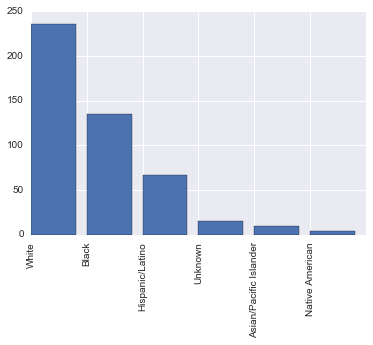

In [79]:
plt.bar(range(6), counts)
plt.xticks(range(6), counts.index, rotation="vertical")

##Regional Income Breakdown

In [80]:
#Create a new Pandas Series called income that contains all the values from the p_income column, except the dashes (-).
pk = pk[pk['p_income'] != '-']

In [81]:
pk.shape

(465, 34)

In [82]:
pk['p_income'] = pk['p_income'].astype(int)

In [83]:
pk['p_income'].dtype

dtype('int64')

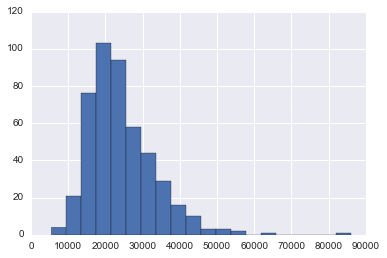

In [84]:
pk['p_income'].hist(bins=20)

There is one caveat to be aware of when looking at population-level data. Finding that more people were shot in Texas than Georgia doesn't automatically mean that cops are more likely to shoot people in Texas. This is because Texas has a higher population than Georgia. To truly figure out which states tend to have police more likely to shoot people, you need to look at a population adjusted rate. You can compute this by dividing the number of people shot in each state by the state population.

Therefore, I will be using state census population data. https://www.census.gov/popest/data/state/asrh/2015/SCPRC-EST2015-18+POP-RES.html

##Shootings by State

In [85]:
pop = pd.read_csv("census_population.csv")
pop.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,10,0,0,0,United States,321418820,247773709,77.1
1,40,3,6,1,Alabama,4858979,3755483,77.3
2,40,4,9,2,Alaska,738432,552166,74.8
3,40,4,8,4,Arizona,6828065,5205215,76.2
4,40,3,7,5,Arkansas,2978204,2272904,76.3


In [86]:
counts = pk['state_fp'].value_counts()
counts.head()

6     74
48    47
12    29
4     25
40    22
Name: state_fp, dtype: int64

In [87]:
states = pd.DataFrame({"STATE": counts.index, "shootings": counts})
states.head()

,STATE,shootings
6,6,74
48,48,47
12,12,29
4,4,25
40,40,22


In [88]:
states = pd.merge(states, pop, on="STATE")

In [89]:
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS
0,6,74,40,4,9,California,39144818,30023902,76.7
1,48,47,40,3,7,Texas,27469114,20257343,73.7
2,12,29,40,3,5,Florida,20271272,16166143,79.7
3,4,25,40,4,8,Arizona,6828065,5205215,76.2
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4


In [90]:
states['pop_millions'] = states['POPESTIMATE2015'] / 1000000

In [91]:
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions
0,6,74,40,4,9,California,39144818,30023902,76.7,39.144818
1,48,47,40,3,7,Texas,27469114,20257343,73.7,27.469114
2,12,29,40,3,5,Florida,20271272,16166143,79.7,20.271272
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338


In [92]:
states['rate'] = states['shootings'] / states['pop_millions']
#Gives the rate of police killings per one million people in each state.
states.head()

,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
0,6,74,40,4,9,California,39144818,30023902,76.7,39.144818,1.890416
1,48,47,40,3,7,Texas,27469114,20257343,73.7,27.469114,1.711013
2,12,29,40,3,5,Florida,20271272,16166143,79.7,20.271272,1.430596
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674


####Ten States with lowest rates:

In [93]:
states.sort(['rate'], ascending = True).head(10)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
43,9,1,40,1,1,Connecticut,3590886,2826827,78.7,3.590886,0.278483
22,42,7,40,1,2,Pennsylvania,12802503,10112229,79.0,12.802503,0.546768
38,19,2,40,2,4,Iowa,3123899,2395103,76.7,3.123899,0.640226
6,36,13,40,1,2,New York,19795791,15584974,78.7,19.795791,0.656705
29,25,5,40,1,1,Massachusetts,6794422,5407335,79.6,6.794422,0.735898
42,33,1,40,1,1,New Hampshire,1330608,1066610,80.2,1.330608,0.751536
45,23,1,40,1,1,Maine,1329328,1072948,80.7,1.329328,0.752260
15,39,9,40,2,3,Ohio,11613423,8984946,77.4,11.613423,0.774965
10,17,11,40,2,3,Illinois,12859995,9901322,77.0,12.859995,0.855366
31,55,5,40,2,3,Wisconsin,5771337,4476711,77.6,5.771337,0.866350


####Ten States with Highest Rates

In [94]:
states.sort(['rate'], ascending = False).head(10)

/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,STATE,shootings,SUMLEV,REGION,DIVISION,NAME,POPESTIMATE2015,POPEST18PLUS2015,PCNT_POPEST18PLUS,pop_millions,rate
4,40,22,40,3,7,Oklahoma,3911338,2950017,75.4,3.911338,5.624674
3,4,25,40,4,8,Arizona,6828065,5205215,76.2,6.828065,3.661359
27,31,6,40,2,4,Nebraska,1896190,1425853,75.2,1.896190,3.164240
34,15,4,40,4,9,Hawaii,1431603,1120770,78.3,1.431603,2.794071
39,2,2,40,4,9,Alaska,738432,552166,74.8,0.738432,2.708442
33,16,4,40,4,8,Idaho,1654930,1222093,73.8,1.654930,2.417021
32,35,5,40,4,8,New Mexico,2085109,1588201,76.2,2.085109,2.397956
7,8,12,40,4,8,Colorado,5456574,4199509,77.0,5.456574,2.199182
11,22,10,40,3,7,Louisiana,4670724,3555911,76.1,4.670724,2.140996
41,10,2,40,3,5,Delaware,945934,741548,78.4,0.945934,2.114312


##State By State Differences

We'll split pk into two parts. One part will have the 10 states with the lowest shooting rate, and the other will have the 10 states with the highest shooting rate. Then, we can look at the differences between the two sets.

In [95]:
pk = pk[
    (pk["share_white"] != "-") & 
    (pk["share_black"] != "-") & 
    (pk["share_hispanic"] != "-")
]

In [96]:
pk.shape

(465, 34)

In [97]:
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)

In [98]:
least = states.sort(['rate'], ascending = True)[:10]
most = states.sort(['rate'], ascending = False)[:10]

/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/molliepettit/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from IPython.kernel.zmq import kernelapp as app


In [99]:
least_states = list(least['STATE'])
most_states = list(most['STATE'])

In [101]:
ls = pk[pk["state_fp"].isin(least_states)]
hs = pk[pk["state_fp"].isin(most_states)]

In [104]:
columns = ["pop", "county_income", "share_white", "share_black", "share_hispanic"]

In [105]:
ls[columns].mean()

pop                4153.472727
county_income     55037.963636
share_white          60.132727
share_black          21.610909
share_hispanic       12.994545
dtype: float64

In [106]:
hs[columns].mean()

pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64

##Next Steps:
Explore some of the columns I didn't look at yet. Some ideas:
Data.gov - http://www.data.gov/
Socrata - https://opendata.socrata.com/
Github - https://github.com/caesar0301/awesome-public-datasets
Census Data - https://www.census.gov
Map out state-level data in a choropleth map with matplotlib. 

Look more into the cause column, and see if there are any patterns.
Is there any other data on police brutality that could augment this analysis?

Look more broadly at crime rates where the shootings occured, and see if there are any correlations.